In [1]:
import pandas as pd

df = pd.read_excel('DATA.xlsx', engine='openpyxl')

numeriques = [2,3,5,10]  #Selecting numerical columns
colonnes_numeriques = df.iloc[:, numeriques]

print(colonnes_numeriques)

C:\Users\Sana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


           MT_ACCORD  DUR_P  Age  Revenu_estime
0       1.080000e+07    252   55  118830.791089
1       1.300000e+07     60   72  642925.787124
2       8.526000e+06    177   48  125185.000000
3       1.080000e+07    228   56  155504.101673
4       8.764000e+06    192   59  123534.530531
...              ...    ...  ...            ...
185531  2.173360e+06     88   38   30375.365191
185532  1.211006e+06    126   54  193364.975311
185533  1.078092e+07     92   56   42888.728733
185534  1.233816e+06    395   38   43062.062665
185535  1.330145e+06    474   35   18913.119512

[185536 rows x 4 columns]


In [2]:
categorielles = [0,1,4, 6, 7, 8, 9]  #Categorical columns

colonnes_categorielles = df.iloc[:, categorielles]



C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


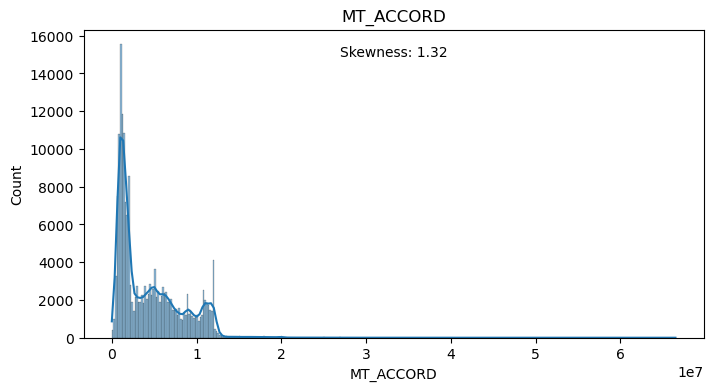

C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


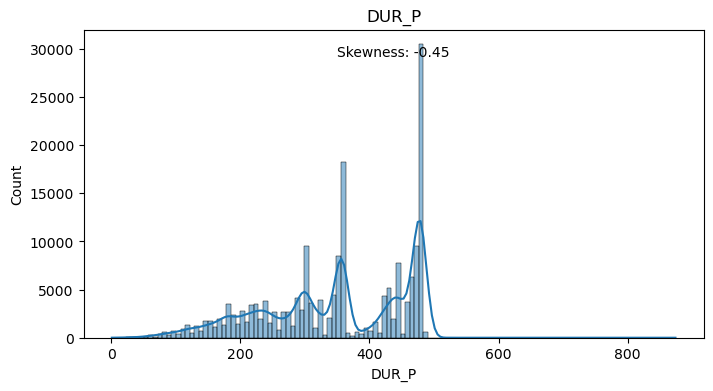

C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


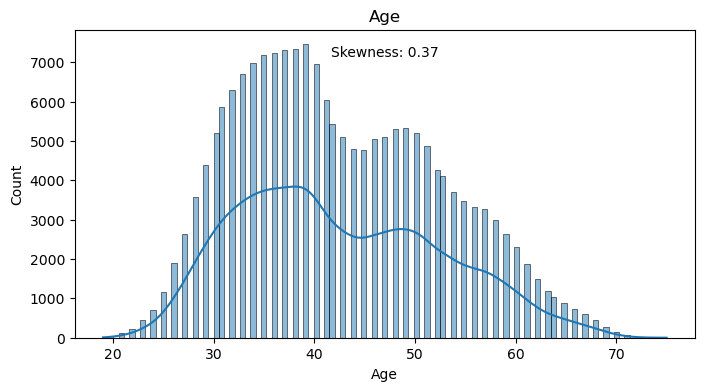

C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


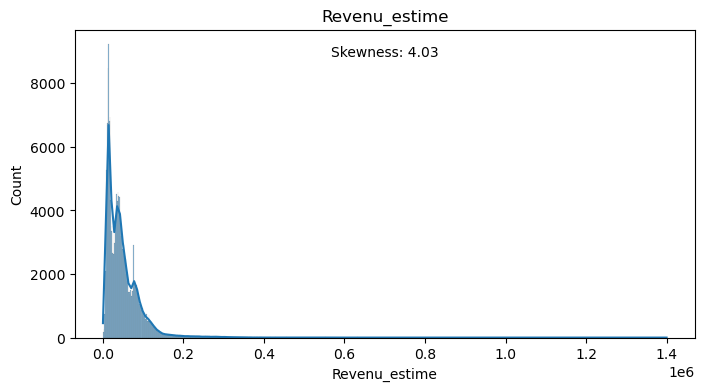

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

#Skewness of each numerical column 
for colonne in colonnes_numeriques.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[colonne], kde=True)
    plt.title(colonne)
    skewness = df[colonne].skew()
    plt.text(0.5, 0.95, f"Skewness: {skewness:.2f}", horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)
    plt.show()

0.06295288257430572
1.417074219066201
0.10761429884530614
0.05793434874280441


C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

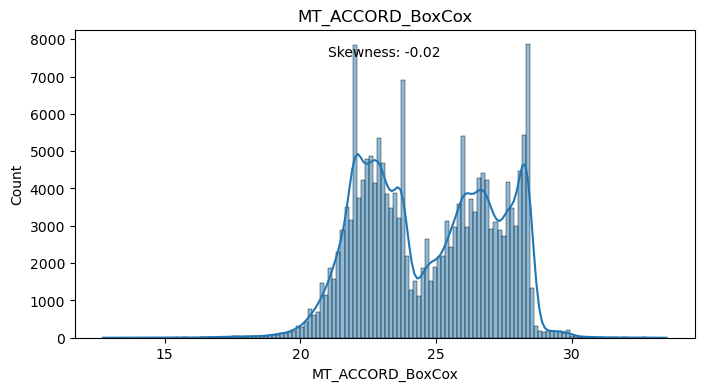

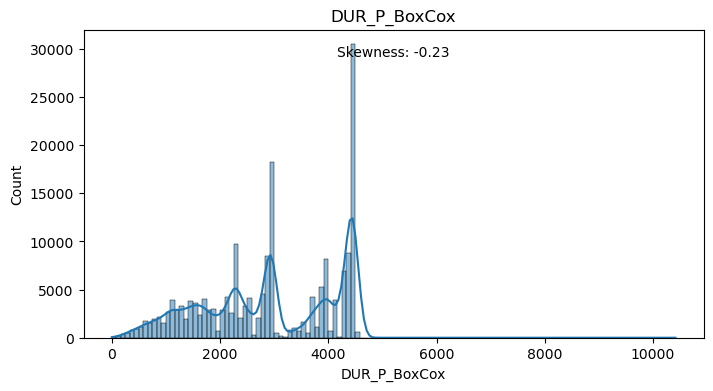

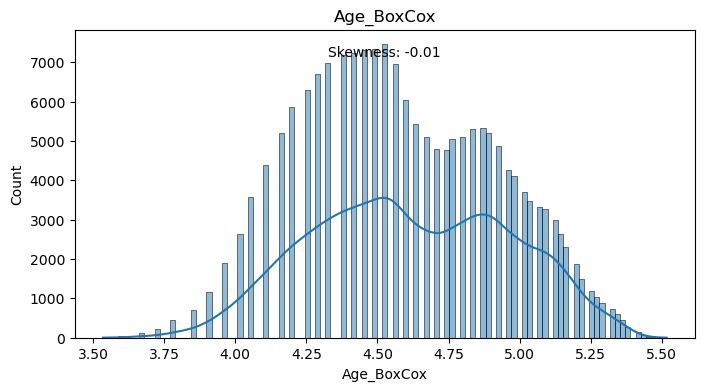

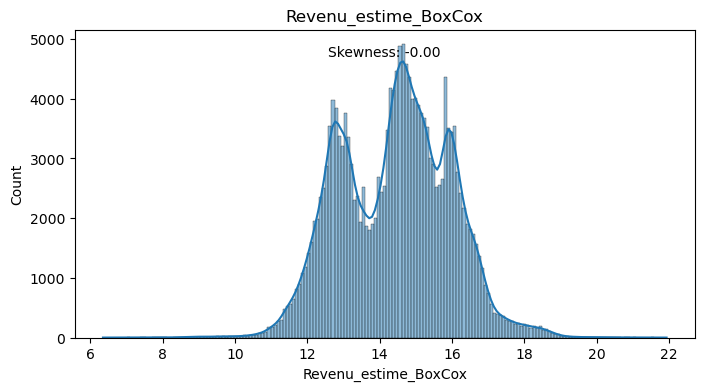

In [4]:
from scipy.stats import boxcox

# Applying boxcox transformation for each numerical column
colonnes_transformees = pd.DataFrame()  #Dataframe to store transformed columns
skewness_values = {}  # Dictinnary to store skewness values after transformation

for colonne in colonnes_numeriques.columns:
    transformed_col, lambda_val = boxcox(df[colonne] + 1)  # Add one for null values
    nom_colonne_transformee = f"{colonne}_BoxCox"
    colonnes_transformees[nom_colonne_transformee] = transformed_col
    skewness_values[nom_colonne_transformee] = pd.Series(transformed_col).skew()
    print(lambda_val)

    
# Dataset Reconstruction
data_transformee = pd.concat([colonnes_transformees, df.iloc[:, categorielles]], axis=1)


# Save transformed data
data_transformee.to_excel('DataTransformedBoxCox.xlsx',index=False, engine='openpyxl')

# Print skewness after transformation
for colonne in colonnes_transformees.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(colonnes_transformees[colonne], kde=True)
    plt.title(colonne)
    plt.text(0.5, 0.95, f"Skewness: {skewness_values[colonne]:.2f}", 
             horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes)